In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_operator_empty_inspections_benchmarks, OperatorBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


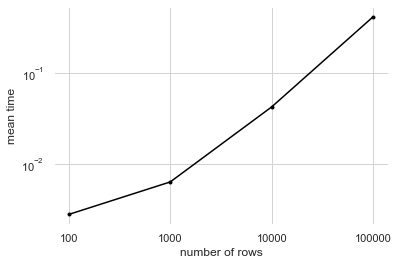

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


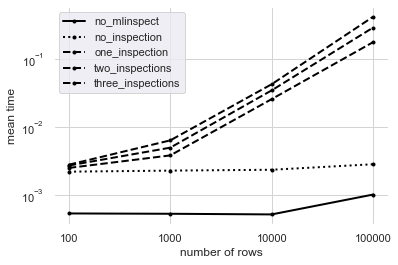

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
def benchmark_operator_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_operator_empty_inspections_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [5]:
row_numbers = [100, 1000, 10000]
#row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

plot_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0006319777999999942, 0.0005380310000001387, 0.0006114891999997596, 0.0008950178000000974]
no inspection: [0.0028174695999998887, 0.002260943000000104, 0.0024727375999997747, 0.0025504893999997334]
one inspection: [0.0026788471999999786, 0.004030603600000226, 0.019555699000000003, 0.18432586500000028]
two inspections: [0.0026276951999999907, 0.005265819000000072, 0.031281165799999934, 0.3083354898000003]
three inspections: [0.002871499399999955, 0.0071821421999999305, 0.04295495579999979, 0.4019482798000006]


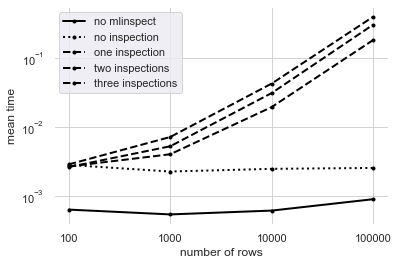

In [6]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.PROJECTION, plot_linestyles)

Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.000449644000000049, 0.00045678419999966023, 0.0005451454000002798, 0.002045304399999992]
no inspection: [0.005424987599999653, 0.004961132000000035, 0.005997774399999401, 0.017373758599999435]
one inspection: [0.008560309399999966, 0.012115686799999992, 0.049432874199999685, 0.33088818819999943]
two inspections: [0.008730253799999588, 0.013266515200000129, 0.05693572879999955, 0.5002495785999997]
three inspections: [0.009033153400000415, 0.014770475399999938, 0.07293033639999891, 0.6633426626000002]


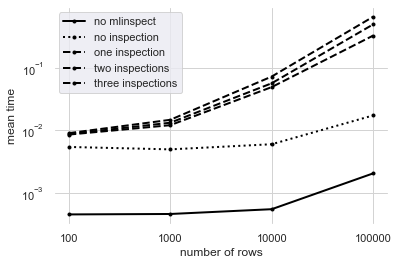

In [7]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.SELECTION, plot_linestyles)

Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.001924413199999009, 0.0017697556000008774, 0.003427388400000808, 0.019492416600000693]
no inspection: [0.006316422999999816, 0.006818080199999343, 0.010969462400000652, 0.05888749240000095]
one inspection: [0.013480789799999827, 0.02137445519999872, 0.05382633520000084, 0.40731169199999895]
two inspections: [0.013319562400000961, 0.02909448119999993, 0.06804259240000121, 0.5745341850000003]
three inspections: [0.013792000400000148, 0.02107138979999945, 0.08498743780000026, 0.7078865839999977]


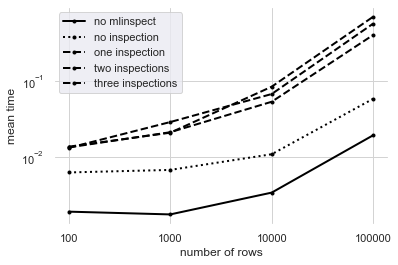

In [8]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.JOIN, plot_linestyles)

Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0006437578000017651, 0.0007353651999991939, 0.002344523799997944, 0.018413824200000307]
no inspection: [0.0028690070000010337, 0.002189687199998502, 0.0038596408000017846, 0.02340469600000148]
one inspection: [0.002621597599998893, 0.004198822800000812, 0.019735921600000948, 0.17543554639999998]
two inspections: [0.0026924816000018837, 0.005494285999996862, 0.03147737439999929, 0.28846474580000175]
three inspections: [0.0026910670000006576, 0.006460135600001138, 0.046441637799998145, 0.39829465180000057]


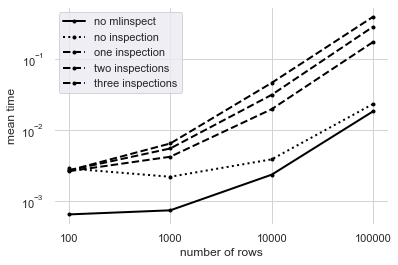

In [9]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, plot_linestyles)

Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0029621169999984433, 0.00278718099999935, 0.002583763799999872, 0.0032119977999997217]
no inspection: [0.004500306399999943, 0.003914716199999191, 0.003883104600001275, 0.005089148399999033]
one inspection: [0.0043996727999982, 0.00573018600000097, 0.0200311157999991, 0.16082242760000015]
two inspections: [0.004383115600002441, 0.0068056176000013124, 0.030997716800000318, 0.2778136704000005]
three inspections: [0.004599926999999582, 0.007304926800000544, 0.04062865499999759, 0.4126146143999961]


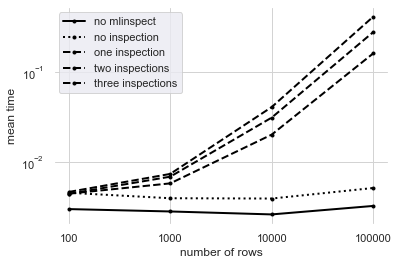

In [10]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, plot_linestyles)

Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.003667000799998732, 0.011255968200001121, 0.07588451360000192, 0.6484873013999988]
no inspection: [0.008079387799998016, 0.012423254199998724, 0.07806922139999414, 0.641700065400002]
one inspection: [0.010219208000003732, 0.024063259999999788, 0.14985496039999474, 1.4357456366000008]
two inspections: [0.010060005800002613, 0.02607690580000508, 0.17023299520000137, 1.7544275744000004]
three inspections: [0.009993545200001109, 0.02761565759999769, 0.18597792060000415, 1.8791430455999971]


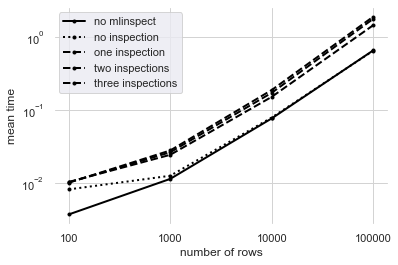

In [11]:
benchmark_operator_and_plot_result(OperatorBenchmarkType.DECISION_TREE, plot_linestyles)